In [3]:
%pip install pandas matplotlib seaborn wordcloud squarify scikit-learn 

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Pearson Correlation: r = 0.0019, p-value = 0.9789
Spearman Correlation: r = 0.0065, p-value = 0.9274
Linear Regression R² = 0.0000


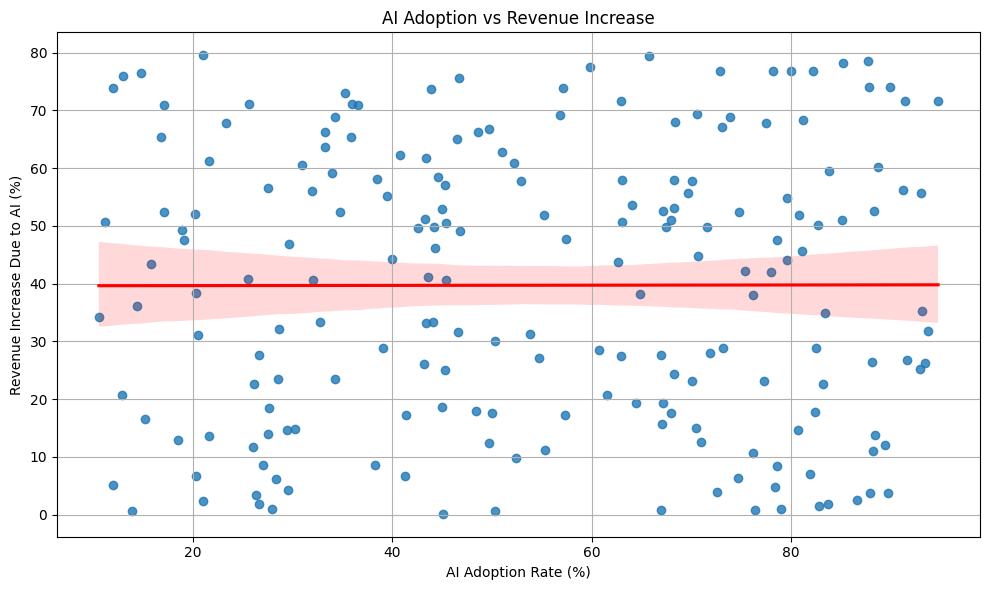

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset (replace with your actual path or DataFrame)
df = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")  # or use pd.read_clipboard() if you're pasting

# ========== PART 1: Correlation and Regression Analysis ==========

# Select relevant columns
df_corr = df[['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)']].copy()

# Drop missing values and convert to numeric
df_corr.dropna(inplace=True)
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
df_corr.dropna(inplace=True)

# Optional: Remove outliers using IQR
Q1 = df_corr.quantile(0.25)
Q3 = df_corr.quantile(0.75)
IQR = Q3 - Q1
df_clean = df_corr[~((df_corr < (Q1 - 1.5 * IQR)) | (df_corr > (Q3 + 1.5 * IQR))).any(axis=1)]

# Pearson Correlation
pearson_r, pearson_p = pearsonr(df_clean['AI Adoption Rate (%)'], df_clean['Revenue Increase Due to AI (%)'])

# Spearman Correlation
spearman_r, spearman_p = spearmanr(df_clean['AI Adoption Rate (%)'], df_clean['Revenue Increase Due to AI (%)'])

# Linear Regression
X = df_clean[['AI Adoption Rate (%)']].values
y = df_clean['Revenue Increase Due to AI (%)'].values

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r_squared = r2_score(y, y_pred)

# Output results
print(f"Pearson Correlation: r = {pearson_r:.4f}, p-value = {pearson_p:.4f}")
print(f"Spearman Correlation: r = {spearman_r:.4f}, p-value = {spearman_p:.4f}")
print(f"Linear Regression R² = {r_squared:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x='AI Adoption Rate (%)', y='Revenue Increase Due to AI (%)', data=df_clean, ci=95, line_kws={'color': 'red'})
plt.title('AI Adoption vs Revenue Increase')
plt.xlabel('AI Adoption Rate (%)')
plt.ylabel('Revenue Increase Due to AI (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ai_vs_revenue_regression.png', dpi=300)
plt.show()



<Figure size 1000x600 with 0 Axes>

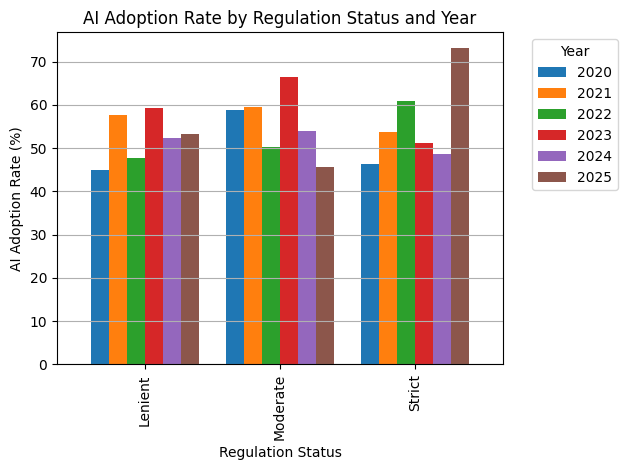

In [22]:
# ========== PART 2: Grouped Bar Chart of AI Adoption by Regulation ==========

# Group by Regulation Status and Year, calculate mean AI Adoption Rate
adoption_by_regulation = df.groupby(['Regulation Status', 'Year'])['AI Adoption Rate (%)'].mean().unstack()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
adoption_by_regulation.plot(kind='bar', width=0.8)
plt.title('AI Adoption Rate by Regulation Status and Year')
plt.xlabel('Regulation Status')
plt.ylabel('AI Adoption Rate (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('regulation_impact_grouped_bar.png', bbox_inches='tight', dpi=300)
plt.show()

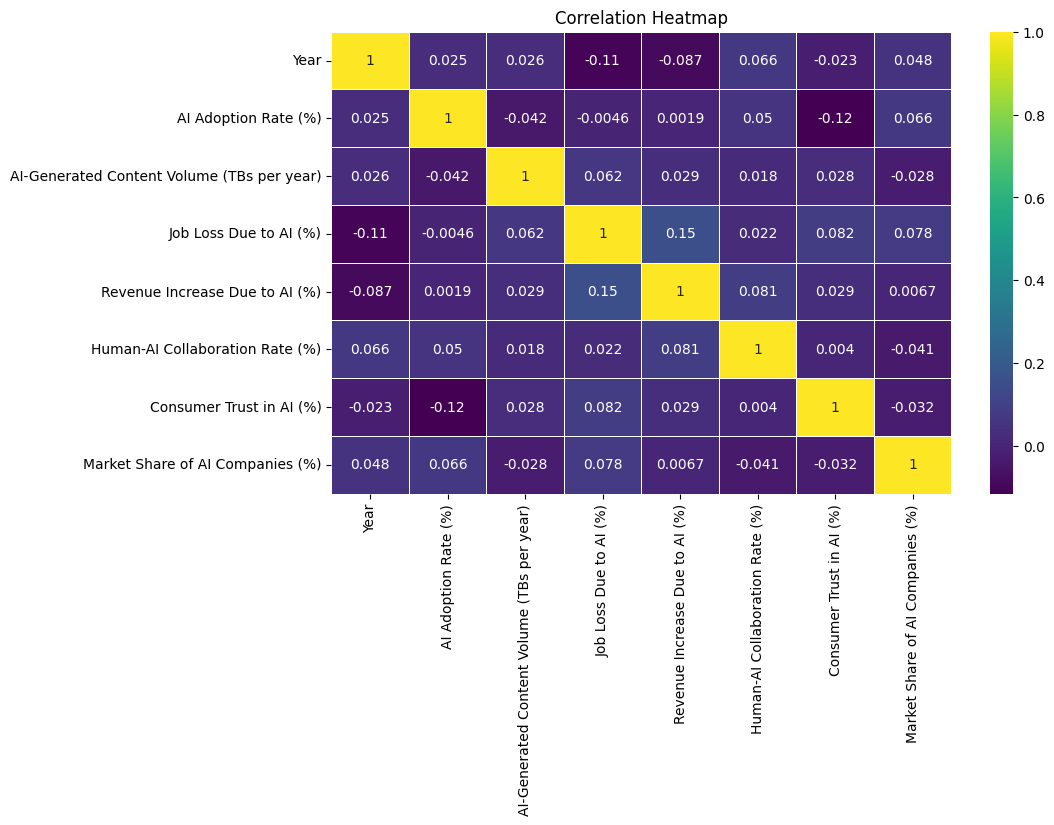

In [23]:
# Correlation Heatmap (Only Numerical Columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the dataset (replace with your actual path or DataFrame)
df = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv") 

# Prepare data
X = df_clean[['AI Adoption Rate (%)']].values
y = df_clean['Revenue Increase Due to AI (%)'].values

# Initialize models
linear_reg = LinearRegression()
poly_reg = PolynomialFeatures(degree=2)
poly_reg_model = LinearRegression()
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=100)
svr_reg = SVR(kernel='rbf')

# Fit models
linear_reg.fit(X, y)
poly_X = poly_reg.fit_transform(X)
poly_reg_model.fit(poly_X, y)
tree_reg.fit(X, y)
rf_reg.fit(X, y)
svr_reg.fit(X, y)

# Predictions
y_pred_linear = linear_reg.predict(X)
y_pred_poly = poly_reg_model.predict(poly_reg.transform(X))
y_pred_tree = tree_reg.predict(X)
y_pred_rf = rf_reg.predict(X)
y_pred_svr = svr_reg.predict(X)

# Calculate R² for each model
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)
r2_tree = r2_score(y, y_pred_tree)
r2_rf = r2_score(y, y_pred_rf)
r2_svr = r2_score(y, y_pred_svr)

# Output R² scores
print(f"Linear Regression R² = {r2_linear:.4f}")
print(f"Polynomial Regression R² = {r2_poly:.4f}")
print(f"Decision Tree R² = {r2_tree:.4f}")
print(f"Random Forest R² = {r2_rf:.4f}")
print(f"Support Vector Regression R² = {r2_svr:.4f}")



Linear Regression R² = 0.0000
Polynomial Regression R² = 0.0017
Decision Tree R² = 0.9967
Random Forest R² = 0.7639
Support Vector Regression R² = -0.0070


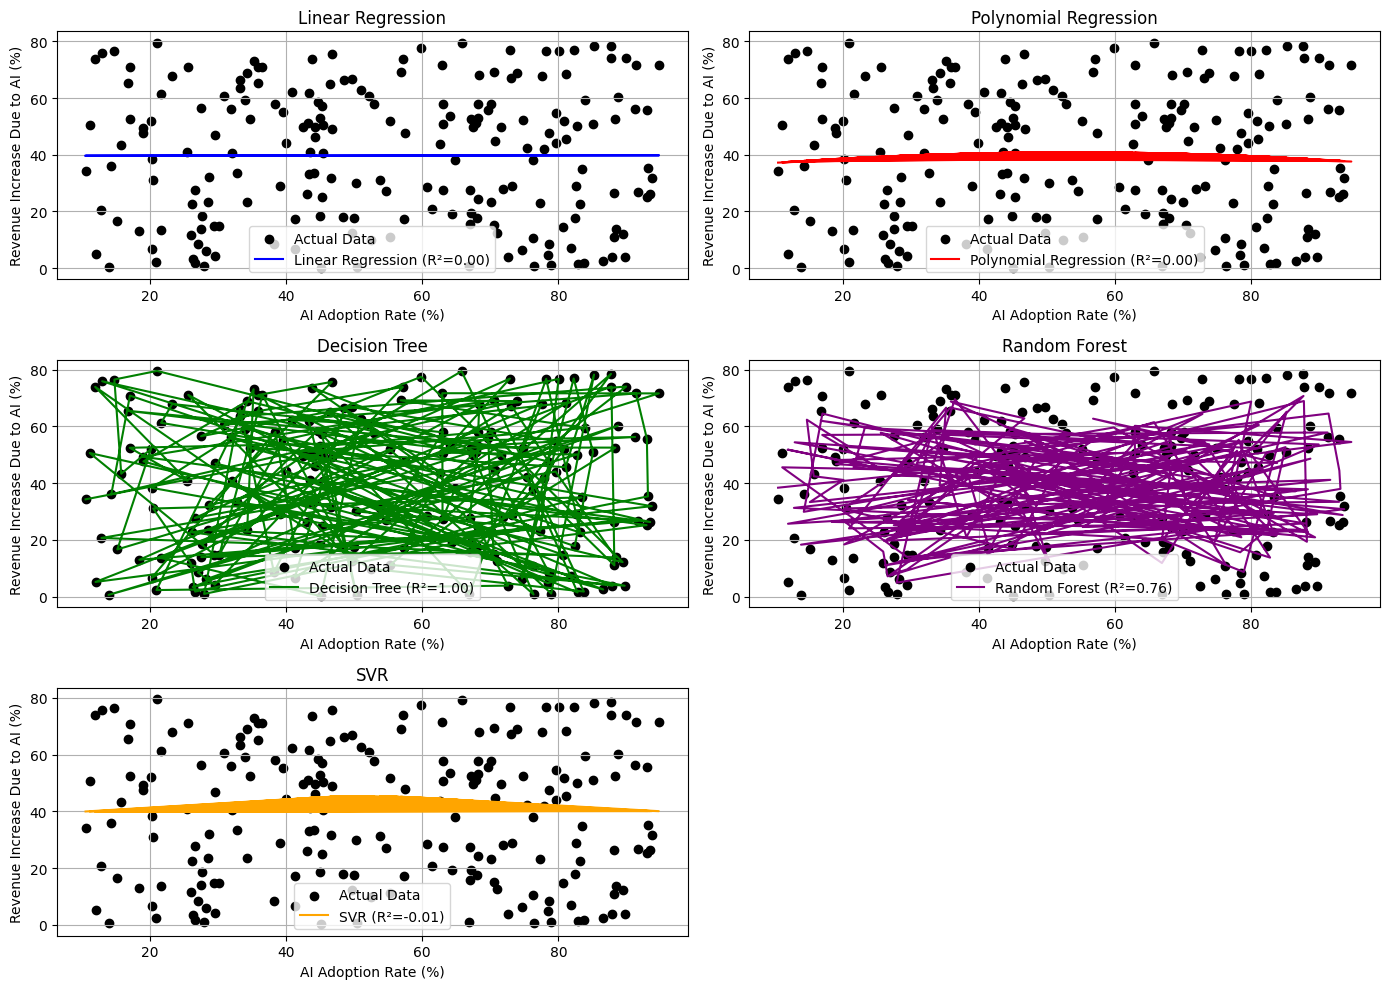

In [10]:
plt.figure(figsize=(14, 10))

# Plot each model's prediction in a separate subplot
models = [
    ('Linear Regression', y_pred_linear, 'blue'),
    ('Polynomial Regression', y_pred_poly, 'red'),
    ('Decision Tree', y_pred_tree, 'green'),
    ('Random Forest', y_pred_rf, 'purple'),
    ('SVR', y_pred_svr, 'orange')
]

for i, (model_name, y_pred, color) in enumerate(models, 1):
    plt.subplot(3, 2, i)
    plt.scatter(X, y, color='black', label='Actual Data')
    plt.plot(X, y_pred, color=color, label=f'{model_name} (R²={r2_score(y, y_pred):.2f})')
    plt.title(model_name)
    plt.xlabel('AI Adoption Rate (%)')
    plt.ylabel('Revenue Increase Due to AI (%)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


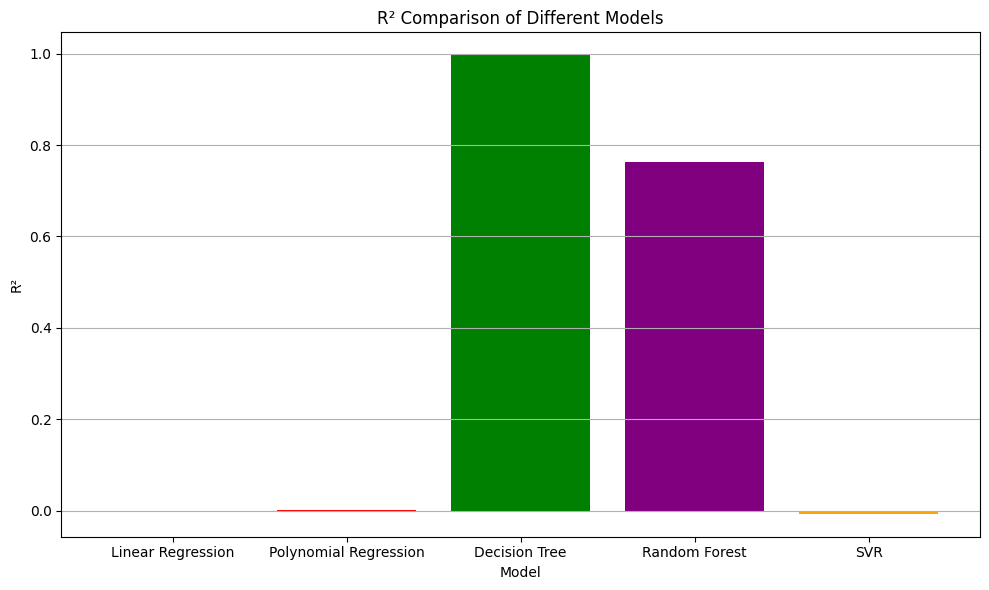

In [11]:
plt.figure(figsize=(10, 6))
r2_scores = [r2_linear, r2_poly, r2_tree, r2_rf, r2_svr]
models_names = ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest', 'SVR']

plt.bar(models_names, r2_scores, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.title('R² Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('R²')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
